# 1. Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [2]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# 1 - Business Problem

Perform Clustering for the crime data and identify the number of clusters formed and draw inferences

# 2 - Data collection and description

In [6]:
data_back = pd.read_csv(r"crime_data.csv")
data_back

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [7]:
data = data_back.copy()
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [10]:
data.columns = ['City', 'Murder', 'Assault', 'UrbanPop', 'Rape']

In [11]:
data

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [13]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [14]:
data.loc[:,'Total'] = data.sum(numeric_only=True, axis=1)

In [15]:
data

,City,Murder,Assault,UrbanPop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6
5,Colorado,7.9,204,78,38.7,328.6
6,Connecticut,3.3,110,77,11.1,201.4
7,Delaware,5.9,238,72,15.8,331.7
8,Florida,15.4,335,80,31.9,462.3
9,Georgia,17.4,211,60,25.8,314.2


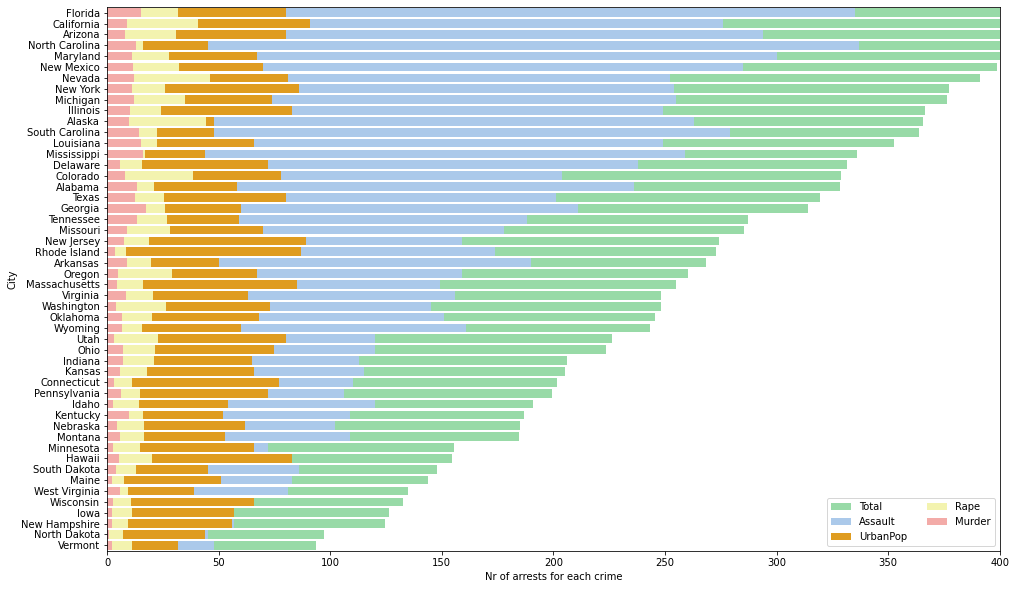

In [37]:
f, ax = plt.subplots(figsize=(16, 10))

stats = data.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="City", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="City", data=stats,
            label="Assault", color="b")

sns.barplot(x="UrbanPop", y="City", data=stats,
            label="UrbanPop", color="orange")

sns.barplot(x="Rape", y="City", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="City", data=stats,
            label="Murder", color="r")




ax.legend(ncol=2, loc="lower right", frameon=True)

ax.set(xlim=(0, 400), ylabel="City",
       xlabel="Nr of arrests for each crime");

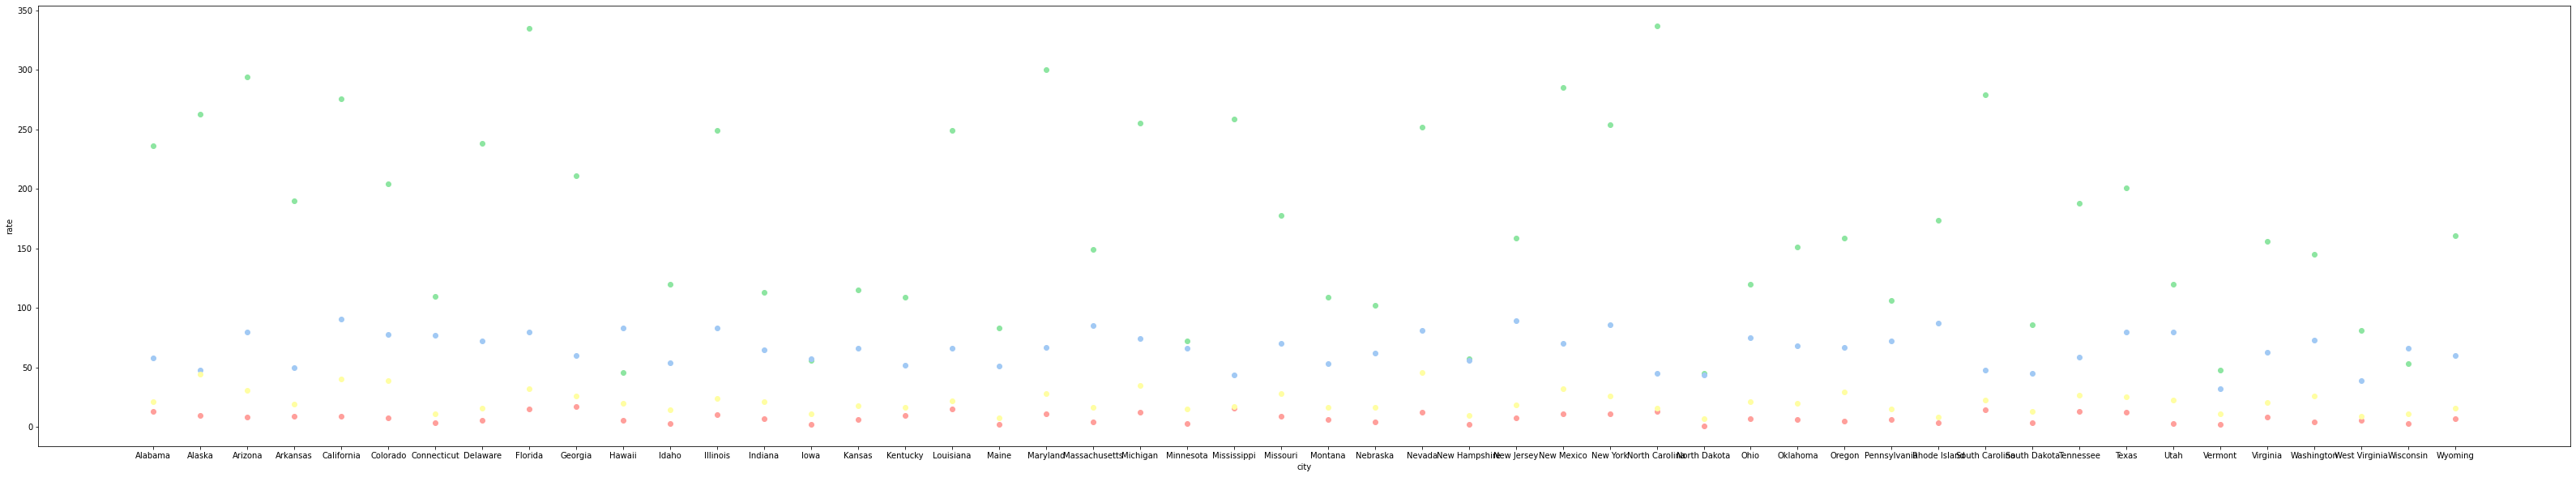

In [49]:
f, ax = plt.subplots(figsize=(56, 10))
plt.scatter(data.City, data.Murder, color='r')
plt.scatter(data.City, data.Assault, color='g')
plt.scatter(data.City, data.UrbanPop, color='b')
plt.scatter(data.City, data.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()


# 3 - Finding out the optimal number of clusters

In [51]:
#Standardise the data

scale = StandardScaler()
scale_data = scale.fit_transform(data.iloc[:,1:])

scale_df = pd.DataFrame(scale_data)

In [52]:
scale_df.head()

,0,1,2,3,4
0,1.255179,0.790787,-0.526195,-0.003451,0.647889
1,0.513019,1.118060,-1.224067,2.509424,1.028940
2,0.072361,1.493817,1.009122,1.053466,1.517835
3,0.234708,0.233212,-1.084492,-0.186794,0.030607
4,0.281093,1.275635,1.776781,2.088814,1.553783


# K-MEANS

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


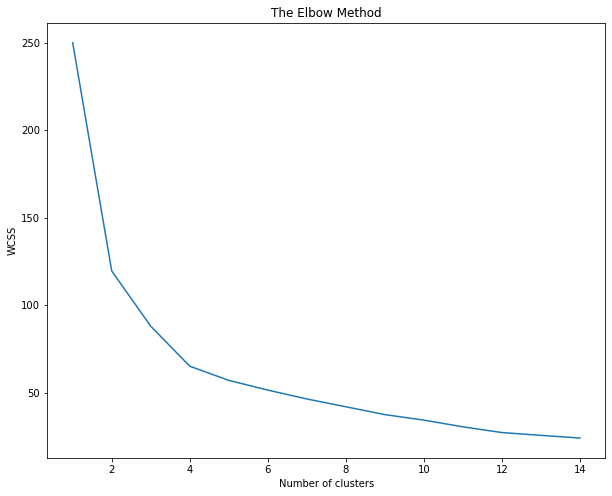

In [53]:
#Kmeans clustering is used to choose centroid that minimize inertia or within cluster sum-of-squares criteria

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scale_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The screen plot levels off at k=4 and let's use it to determine the clusters

# 4 - Analysing the data

In [64]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scale_df)

In [65]:
y_kmeans

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [66]:

cluster = list(y_kmeans)

In [67]:
data['cluster'] = cluster

In [68]:
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape,Total
cluster,,,,,
0,3.6,78.5,52.1,12.2,146.4
1,11.0,264.0,76.5,33.6,385.1
2,5.9,141.2,73.6,19.3,240.0
3,13.9,243.6,53.8,21.4,332.7


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

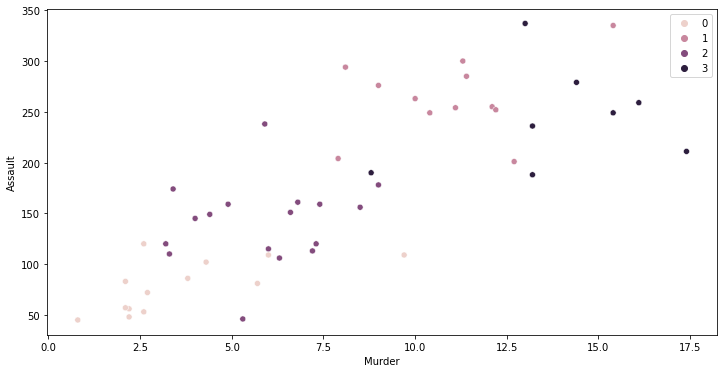

In [78]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['Murder'], y = data['Assault'],hue=y_kmeans)

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

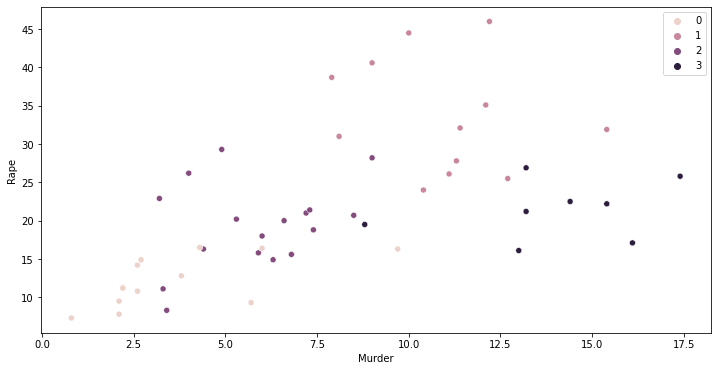

In [71]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['Murder'], y = data['Rape'],hue=y_kmeans)

<AxesSubplot:xlabel='Rape', ylabel='Assault'>

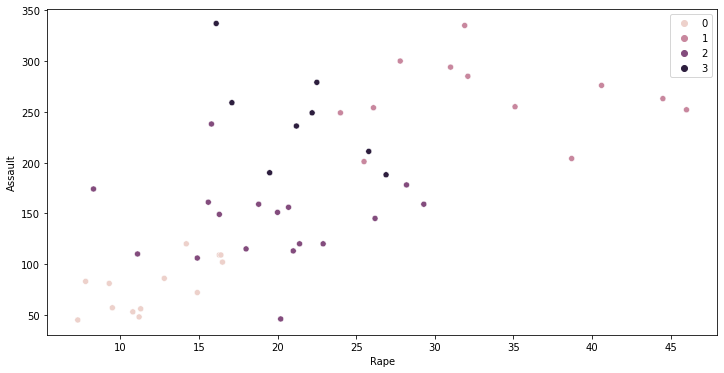

In [72]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['Rape'], y = data['Assault'],hue=y_kmeans)

In [73]:
stats = data.sort_values("Total", ascending=True)
data_total= pd.DataFrame(stats)

In [74]:
data_total.head()

,City,Murder,Assault,UrbanPop,Rape,Total,cluster
44,Vermont,2.2,48,32,11.2,93.4,0
33,North Dakota,0.8,45,44,7.3,97.1,0
28,New Hampshire,2.1,57,56,9.5,124.6,0
14,Iowa,2.2,56,57,11.3,126.5,0
48,Wisconsin,2.6,53,66,10.8,132.4,0


# DBScan

In [79]:
# we have 5 columns so we take min_samples as 5 and epsilon=n-1 ie 5-1 = 4

db=DBSCAN(eps=4,min_samples=5)
db.fit(scale_data)

DBSCAN(eps=4)

In [80]:
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

All are normal data

In [82]:
#Assign clusters to the dataset
data2=data_back.copy()
data2['clusterid_new']=db.labels_

In [83]:
data

,City,Murder,Assault,UrbanPop,Rape,Total,cluster
0,Alabama,13.2,236,58,21.2,328.4,3
1,Alaska,10.0,263,48,44.5,365.5,1
2,Arizona,8.1,294,80,31.0,413.1,1
3,Arkansas,8.8,190,50,19.5,268.3,3
4,California,9.0,276,91,40.6,416.6,1
5,Colorado,7.9,204,78,38.7,328.6,1
6,Connecticut,3.3,110,77,11.1,201.4,2
7,Delaware,5.9,238,72,15.8,331.7,2
8,Florida,15.4,335,80,31.9,462.3,1
9,Georgia,17.4,211,60,25.8,314.2,3


# Heirarchial

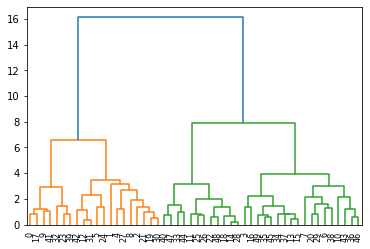

In [85]:
dendrogram = sch.dendrogram(sch.linkage(scale_data, method='ward'))

In [107]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(scale_data)
labels = model.labels_

In [108]:
labels

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

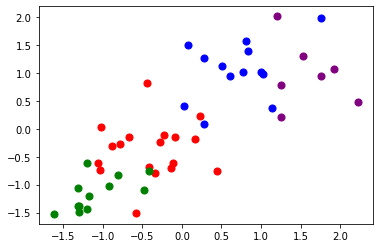

In [109]:
plt.scatter(scale_data[labels==0, 0], scale_data[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(scale_data[labels==1, 0], scale_data[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(scale_data[labels==2, 0], scale_data[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(scale_data[labels==3, 0], scale_data[labels==3, 1], s=50, marker='o', color='purple')

plt.show()

# 5 - Conclusion
1 - Analysing Murder and Assault variables shows a clearer connection between them. Higher the murder rates in a city higer the assaults and vice versa

2 - Contrary to murders and assaults, there is much more spread among the clusters when comparing murders and rapes. Some correlation is visible, but low murder rates in a city seem to indicate lower number of rapes and vice versa

3 - As with murder and assault, also rates of rape and assault show clearer correlations

4 - There is no Noise in this data.

# 2. Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the EastWestAirlines data and identify the number of clusters formed and draw inferences.

# 1 - Business Problem

Perform Clustering for the airline data and identify the number of clusters formed and draw inferences

# 2 - Data collection and description

In [112]:
airline_back = pd.read_csv(r"EastWestAirlines.csv")
airline_back

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [113]:
air = airline_back.copy()
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [115]:
air.columns = ['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award']

In [116]:
air

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [118]:
air.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# 3 - Finding out the optimal number of clusters

In [121]:
#Standardise the data

scale = StandardScaler()
scale_data = scale.fit_transform(air.iloc[:,1:])

scale_df = pd.DataFrame(scale_data)

In [122]:
scale_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,-0.548326
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,-0.626705
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,-0.396657
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,-0.663725
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0.463895


# K-MEANS

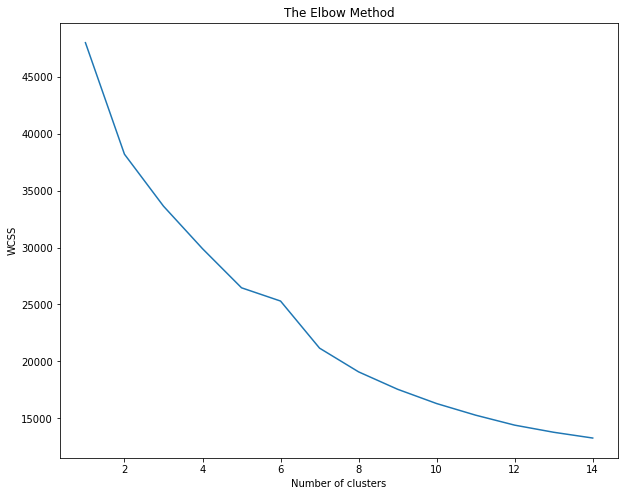

In [123]:
#Kmeans clustering is used to choose centroid that minimize inertia or within cluster sum-of-squares criteria

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scale_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The screen plot levels off at k=2 and let's use it to determine the clusters

# 4 - Analysing the data

In [124]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scale_df)

In [125]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [126]:
cluster = list(y_kmeans)

In [128]:
air['cluster'] = cluster

In [129]:
kmeans_mean_cluster = pd.DataFrame(round(air.groupby('cluster').mean(),1))
kmeans_mean_cluster

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Total
cluster,,,,,,,,,,,,,
0,2220.0,42905.5,86.8,1.4,1.0,1.0,6160.4,7.9,219.6,0.7,3741.0,0.2,55345.6
1,1512.6,148726.7,284.3,3.7,1.0,1.0,44028.2,20.7,1048.6,3.1,5042.5,0.7,200673.2


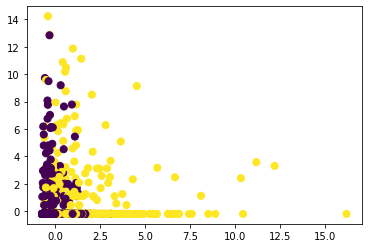

In [133]:
plt.scatter(scale_data[:, 0], scale_data[:, 1], c=y_kmeans, s=50, cmap='viridis')

# DBScan

In [134]:
# we have 12 columns so we take min_samples as 12 and epsilon=n-1 ie 12-1 = 11

db=DBSCAN(eps=11,min_samples=12)
db.fit(scale_data)

DBSCAN(eps=11, min_samples=12)

In [135]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
#Assign clusters to the dataset
data2=airline_back.copy()
data2['clusterid_new']=db.labels_

In [138]:
data2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [139]:
data2.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,3606.000000,160114.000000,500.000000,1.00000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.00000,1373.000000,1.000000
1,0,2014.421461,73579.688594,144.025513,2.05978,1.014507,1.012256,17131.137069,11.583292,452.462731,1.36068,4119.246123,0.370185


In [140]:
data2[data2['clusterid_new']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


These are 1 cluster

In [141]:
data2[data2['clusterid_new']==-1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,-1


This is Noise

# Heirarchial

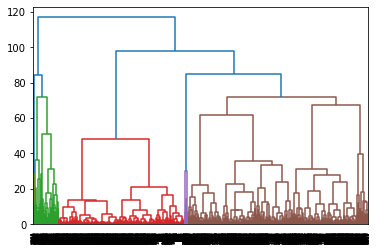

In [142]:
dendrogram = sch.dendrogram(sch.linkage(scale_data, method='ward'))

From the Ward method, we see that as the height increases the clusters get grouped together

We decided to cut the tree at height 85 to obtain 3 clusters and then assigned each cluster with its respective observations

In [143]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(scale_data)
labels = model.labels_

In [144]:
labels

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

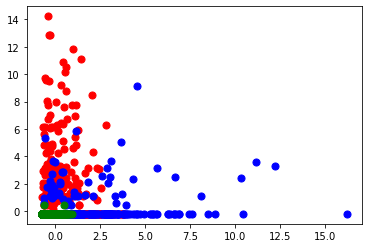

In [145]:
plt.scatter(scale_data[labels==0, 0], scale_data[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(scale_data[labels==1, 0], scale_data[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(scale_data[labels==2, 0], scale_data[labels==2, 1], s=50, marker='o', color='green')

# 5 - Conclusion
From the above data generated from K-Means clustering, we can see Cluster-1 has around 63% total travelers and cluster 2 has 33% of the travelers. We will target cluster 1 & 2. Cluster 1 contains less frequent or first time travellers, by giving them discount provided they travel more than twice or thrice and introduce more offer if they register or take the membership.